## The aim of this lab is to build a system for sentiment analysis on a dataset of tweets.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

In [ ]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

The data consist on passenger's reviews of U.S. airlines: https://www.kaggle.com/crowdflower/twitter-airline-sentiment 

In [2]:
data = pd.read_csv('local/data/Tweets.csv')
# Keeping only the neccessary columns
data = data[['text','airline_sentiment']]

In [3]:
data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [5]:
import re
#Remove neutral class
data = data[data.airline_sentiment != "neutral"]

#text normalization
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x:re.sub('@[^\s]+','',x)))#remove the name of the airline
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
print(np.sum(data['airline_sentiment'].values == 'positive'))
print(np.sum(data['airline_sentiment'].values == 'negative'))

2363
9178


In [6]:
data

,text,airline_sentiment
1,plus youve added commercials to the experienc...,positive
3,its really aggressive to blast obnoxious ente...,negative
4,and its a really big bad thing about it,negative
5,seriously would pay 30 a flight for seats tha...,negative
6,yes nearly every time i fly vx this ear worm ...,positive
...,...,...
14633,my flight was cancelled flightled leaving tom...,negative
14634,right on cue with the delays,negative
14635,thank you we got on a different flight to chi...,positive
14636,leaving over 20 minutes late flight no warnin...,negative


In [7]:
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

In [8]:
data

,text,airline_sentiment
1,plus youve added commercials to the experienc...,positive
3,its really aggressive to blast obnoxious ente...,negative
4,and its a really big bad thing about it,negative
5,seriously would pay 30 a flight for seats tha...,negative
6,yes nearly every time i fly vx this ear worm ...,positive
...,...,...
14633,my flight was cancelled flightled leaving tom...,negative
14634,right on cue with the delays,negative
14635,thank you we got on a different flight to chi...,positive
14636,leaving over 20 minutes late flight no warnin...,negative


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/julian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/julian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Removing Stop Words
from nltk.corpus import stopwords
all_sentences = data['text'].values
all_words = [nltk.word_tokenize(sent) for sent in all_sentences]
stop_words = stopwords.words('english')
stop_words.append('')

for i in range(len(all_words)):  
    all_words[i] = [w for w in all_words[i] if w not in stop_words]

## Exercise 1

all_words is a list with all the tweets that are going to be used to train the model. Tokenize the tweets using a dictionary of 2000 words (remeber that position 0 is reserved). Once the sentences are tokenized, take into account that the length of every tweet is different so before they can be passed to the training step, the tweets must be **padded** in order to provide them with equal length.

Review the padding function in the preprocessing module of keras and apply it to the tokenized sequences. 

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


## Exercise 2

The previous step add 0's to some tweets in order to provide them with the same length. Now it is necessary to define a model that be able to discard those 0's. Review the masking layer and masking option of the embedding layer of keras. 

Define a LSTM architecture to classify the tweets as "negative" or "positive". Use the Embedding layer and its masking option to discard the 0's added during padding step. Evaluate the performance of the model for embed_dim = [32,64,128] and a LSTM layer with cells = [32,64,128]. Use 20% of the data for testing purposes and 10 epochs for training. 

In [17]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.2, random_state=2018)

You should get the following results:

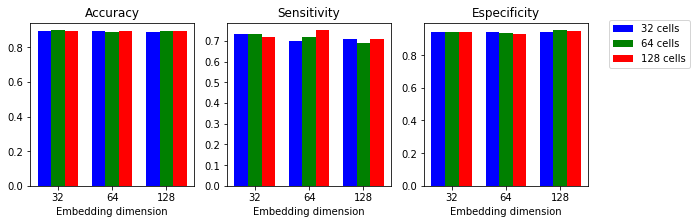

Best accuracy= 0.8973581637072325


## Exercise 3

Train a CBOW model with the dataset using and Embedding dimension of [32,64,128]. Create a new network and transfer the pretrained weights to the Embedding layer. Use the same architecture than before (except for the Embedding layer). Compare the results.

**Note**: Take care on the tokenization of the words. Keras tokenizer does not assign the zero value to any word because of padding purposes. Make sure that the order of the vectors in the CBOW embedding matrix corresponds with the indexs used to represent the words in the data. 

You should get a small improvement:

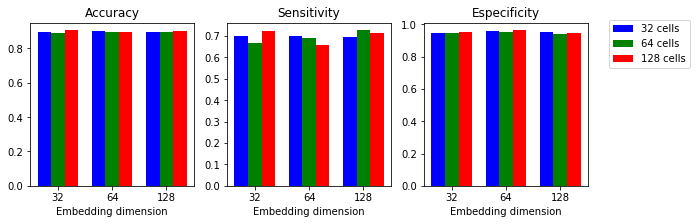

Best accuracy= 0.9034213945430922


## Exercise 4

Load pretrained GloVe Embeddings [glove.6B.zip](http://nlp.stanford.edu/data/glove.6B.zip). Create a new network and transfer the pretrained weights to the Embedding layer. Use the same architecture than before (except for the Embedding layer). Compare the results.

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip     

You should get the following results:

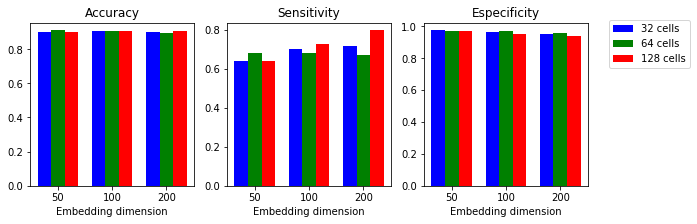

Best accuracy= 0.9086184495452577


## Exercise 5

Use a CNN architeture (Conv1D) instead of the LSTM one. Use [6,12,24] filters and define the kernel to use trigrams. You can use the GloVe embedding weights used for the former excercise. Compare the results.

In [37]:
#hint:

def Model_Sentiment(Embeb,filters):
    model = Sequential([
        Embedding(input_dim=max_fatures, output_dim=Embeb, weights = [wordsmatrix], trainable = False, mask_zero=True),
        Conv1D(filters,kernel_size=?????,activation='relu',padding='same'),
        GlobalMaxPooling1D(),
        #Complete the model
    ])
    return model

You should get the following results:

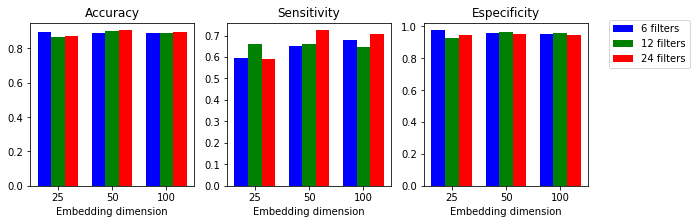

Best accuracy= 0.9047206582936336
